In [46]:
from __future__ import print_function
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as pl

import statsmodels.api as sm

from statsmodels.graphics.api import qqplot

%pylab inline
import matplotlib
matplotlib.style.use('fivethirtyeight')
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [47]:
data = pd.read_excel("NYCHomelessShelterPopulation-Worksheet1983-Present_Oct2016.xlsx")

In [48]:
data = data[["Time","Total Families"]]
data.dropna(axis=0,inplace=True)
data["Time"] = data["Time"].apply(lambda x: pd.to_datetime(x))

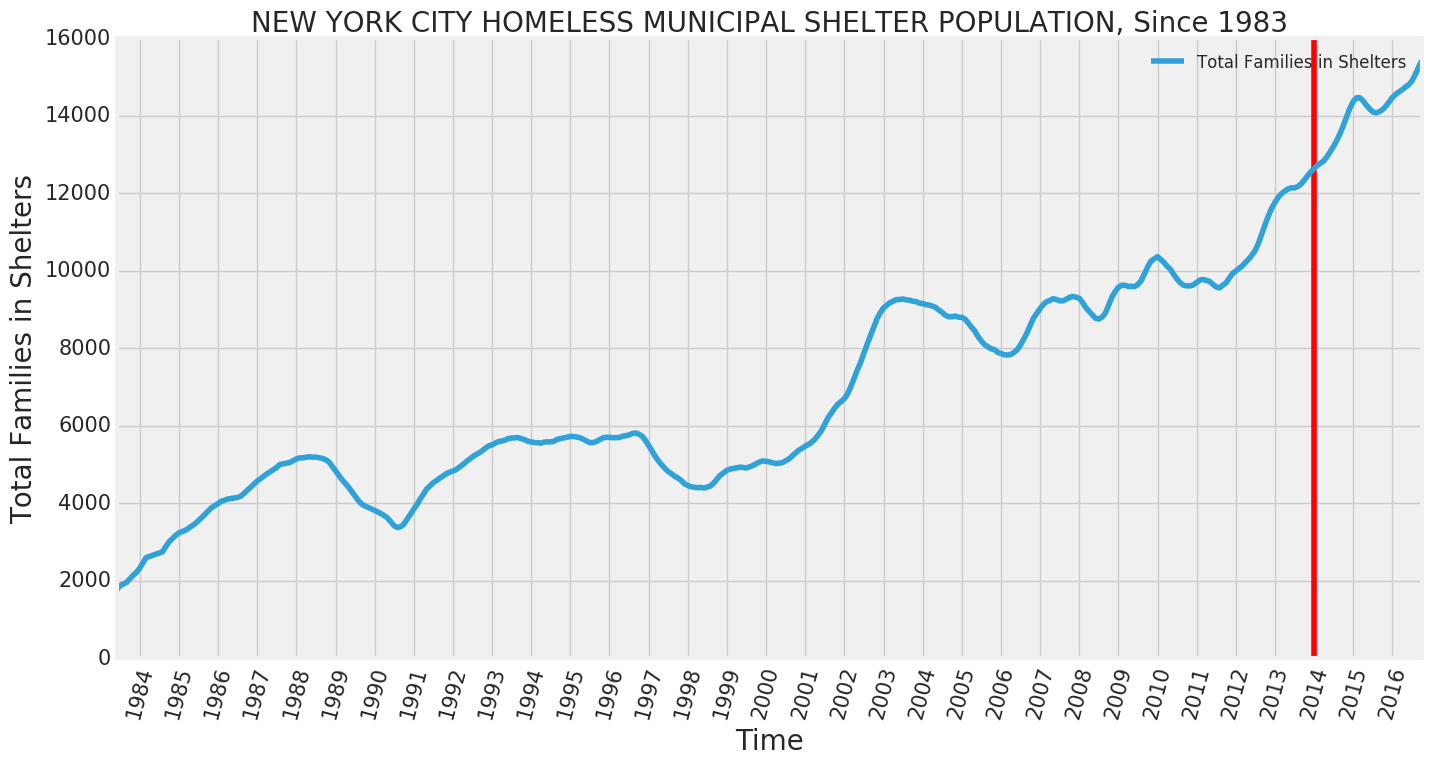

In [49]:
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
import datetime
years = YearLocator()   # every year
months = MonthLocator()  # every month
yearsFmt = DateFormatter('%Y')
monthsFmt = DateFormatter('%m')
ax = pl.figure(figsize = (15,8)).gca()
ax.plot(data["Time"], data["Total Families"].rolling(window = 5).mean(),label="Total Families in Shelters")
pl.xlabel('Time', fontsize=20)
pl.ylabel('Total Families in Shelters', fontsize=20)
pl.title("NEW YORK CITY HOMELESS MUNICIPAL SHELTER POPULATION, Since 1983", fontsize=20)
#pl.grid()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
# ax.xaxis.set_minor_locator(months)
# ax.xaxis.set_minor_formatter(monthsFmt)
pl.xticks(rotation = 75, fontsize = 15)
pl.yticks(fontsize = 15)
pl.legend(loc="best")
pl.vlines(datetime.date(2014,1,1), 0, 16000,color="red")
pl.show()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  app.launch_new_instance()


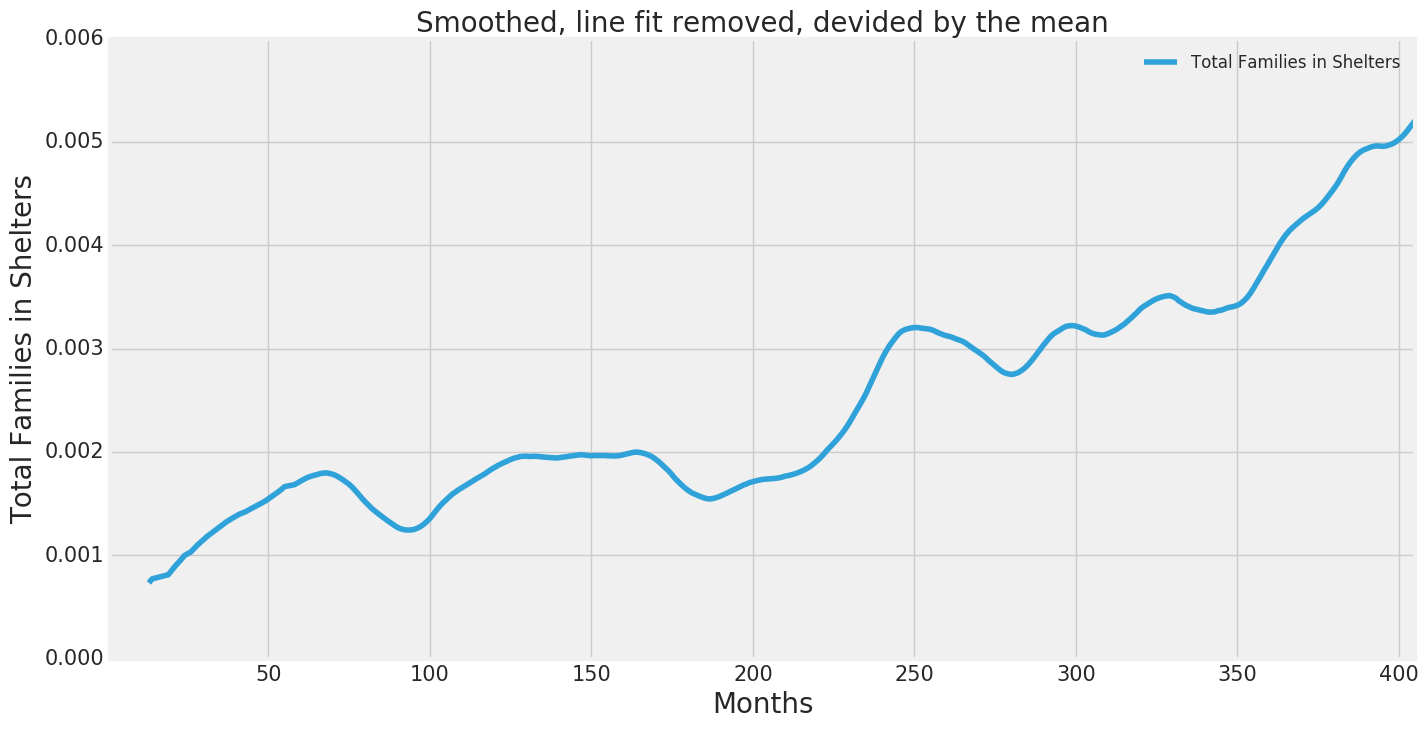

In [50]:
fig = pl.figure(figsize=(15,8))
ax = fig.add_subplot(111)
ax = pd.rolling_mean(data["Total Families"]/data["Total Families"].sum(), 12).plot(fontsize=15, label='Total Families in Shelters')

ax.set_title("Smoothed, line fit removed, devided by the mean", fontsize=20)
pl.xlabel("Months", fontsize=20)
pl.ylabel("Total Families in Shelters", fontsize=20)
pl.legend(loc='best')